In [1]:
# IMPORTANDO LIBRERÍAS

In [2]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet 

In [4]:
# EXPLORANDO LOS DATOS

In [5]:
data1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines = False)
data2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
data3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
data4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)


b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\David\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


### veamos sus dimensiones

In [6]:
data1.shape

(1923515, 23)

In [7]:
data2.shape

(1872343, 23)

In [8]:
data3.shape

(2688710, 23)

In [9]:
data4.shape

(1456714, 23)

In [10]:
### Juntemos los dataframes

In [11]:
data = pd.concat([data1,data2,data3,data4])

In [12]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [13]:
data.head(50)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1.82938e+06,2001.0,08/29/2006 03:46:28 AM,41.687,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1.84483e+06,2003.0,04/15/2016 08:55:02 AM,41.7297,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1.89576e+06,2003.0,04/15/2016 08:55:02 AM,41.8698,-87.708180,"(41.869772159, -87.708180162)"


In [14]:
# Minigraifca

<AxesSubplot:>

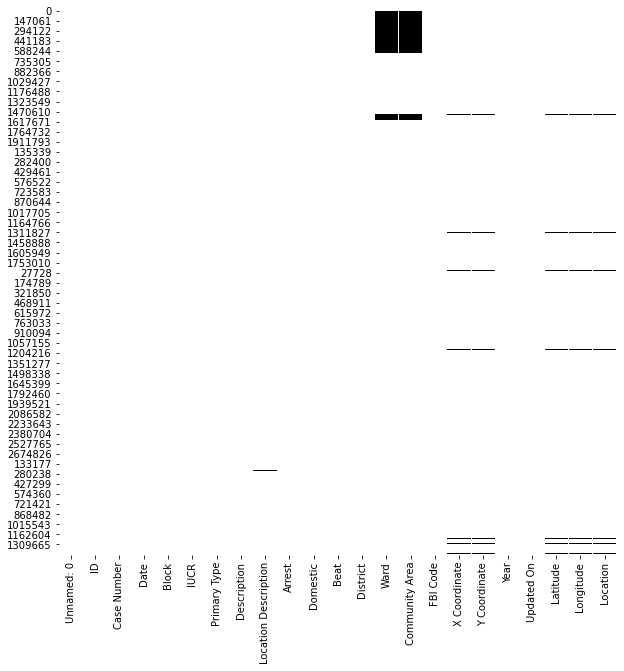

In [15]:
plt.figure(figsize = (10,10)) 
sns.heatmap(data.isnull(), cbar = False, cmap='gnuplot2_r') #aquí con el isnull() le 
#preguntamos si es nulo o no, si es nulo lo ploteamos y aqui en la grafica vemos los nulos
# esto nos sirve para tener una idea de que nos sirve y que no.

In [16]:
data.drop(['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'X Coordinate', 
           'Y Coordinate', 'Latitude', 'Longitude', 'Updated On', 'Year', 'FBI Code', 
           'Beat', 'Ward', 'Community Area', 'Location', 'District' ], axis=1, inplace = True)

# inplace = true borramos de la memoria esas columnas
# axis =1 columna, axis=0 fila

In [17]:
data.head(50)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
5,08/01/2004 12:01:00 AM,012XX S HARDING AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False
6,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True
7,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False
8,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,THEFT,FROM BUILDING,RESIDENCE,False,False
9,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False


In [18]:
#Arreglemos la fecha!

data.Date = pd.to_datetime(data.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [19]:
data.index = pd.DatetimeIndex(data.Date) #Cambiamos el index para poder trabajar mejor

In [20]:
data.head(50)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
2004-08-01 00:01:00,2004-08-01 00:01:00,012XX S HARDING AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False
2001-01-01 11:00:00,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True
2003-03-15 00:00:00,2003-03-15 00:00:00,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False
2004-09-16 10:00:00,2004-09-16 10:00:00,003XX W HUBBARD ST,THEFT,FROM BUILDING,RESIDENCE,False,False


In [21]:
# Veamos los crimenes mas relevantes

In [22]:
data['Primary Type'].value_counts() # Conteo de los elementos en la col 'Primary Type'

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [23]:
# Grafiquemos esto, sólo para ver

In [24]:
#Primero seleccionamos los mas relevantes en orden

In [25]:

order_data = data['Primary Type'].value_counts().iloc[:15].index
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

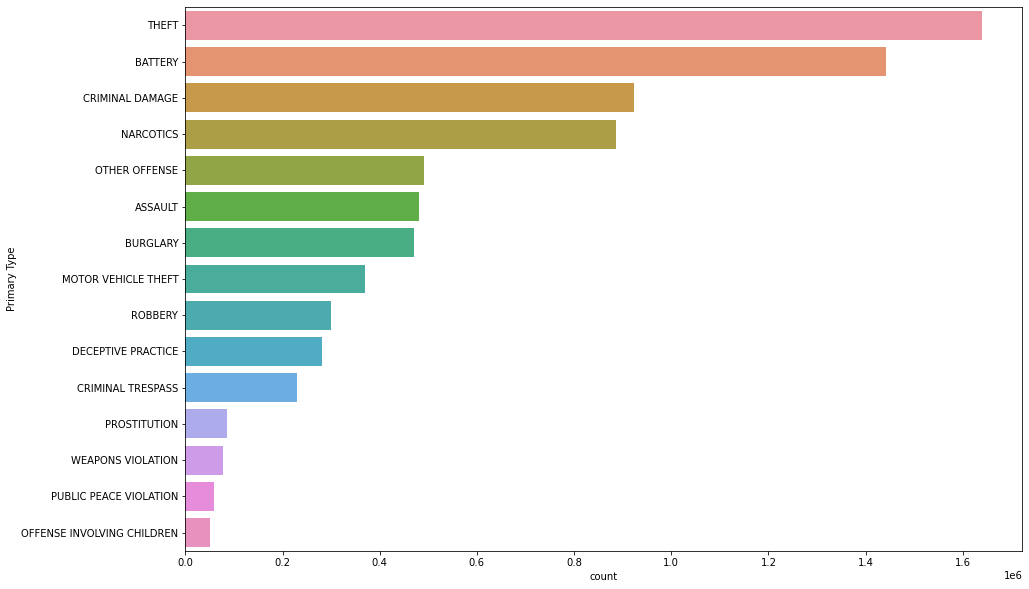

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=data, order= order_data)

In [27]:
# Lo mismo pero veamos su localización

<AxesSubplot:xlabel='count', ylabel='Location Description'>

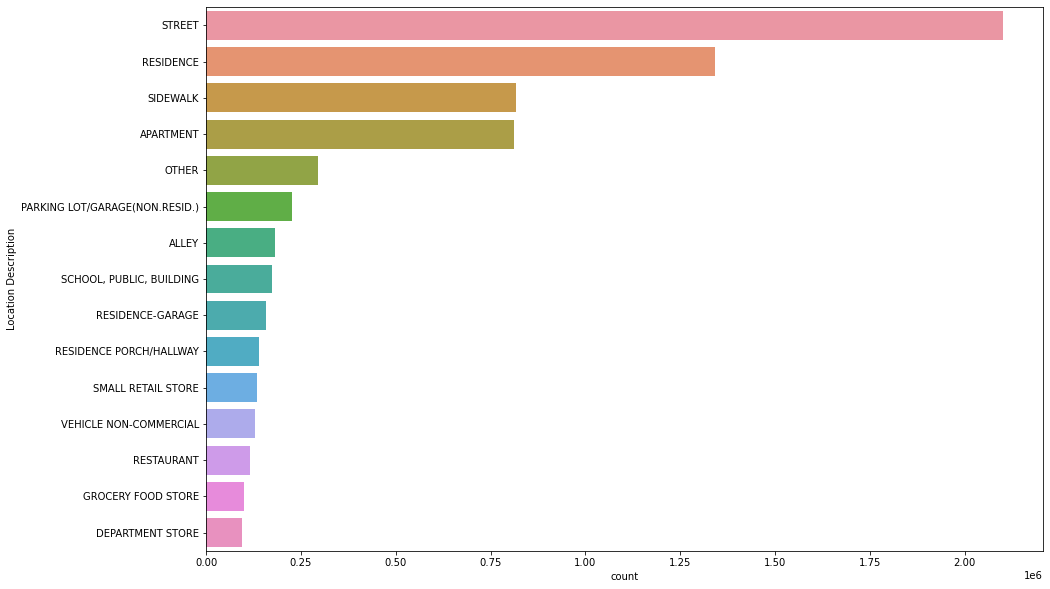

In [28]:
plt.figure(figsize = (15,10))
sns.countplot(y='Location Description', data = data, 
           order = data['Location Description'].value_counts().iloc[:15].index)

In [29]:
# Veamos cuantos de estos crimenes pasan en cierto mes, 

In [30]:
data.resample('Y').size() # Hacemos resample con el dato especifico 'Y' especifico 

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

In [31]:
#grafiquemos por año!

Text(0, 0.5, 'Number of crimes!')

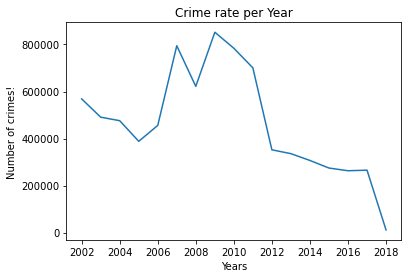

In [32]:
plt.plot(data.resample('Y').size())
plt.title('Crime rate per Year')
plt.xlabel('Years')
plt.ylabel('Number of crimes!')

In [33]:
#grafiquemos por mes!

Text(0, 0.5, 'Number of crimes')

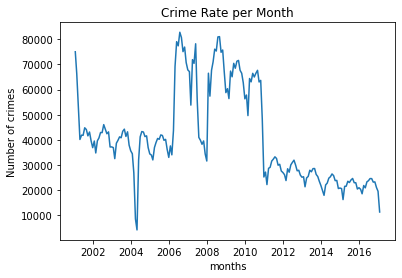

In [34]:
plt.plot(data.resample('M').size())
plt.title('Crime Rate per Month')
plt.xlabel('months')
plt.ylabel('Number of crimes')

In [35]:
#Por cada 4 meses.

Text(0, 0.5, 'Number of crimes')

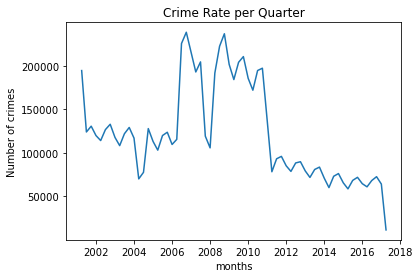

In [36]:
plt.plot(data.resample('Q').size())
plt.title('Crime Rate per Quarter')
plt.xlabel('months')
plt.ylabel('Number of crimes')

Text(0, 0.5, 'Number of crimes')

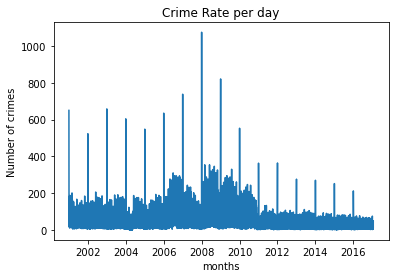

In [37]:
plt.plot(data.resample('H').size())
plt.title('Crime Rate per day')
plt.xlabel('months')
plt.ylabel('Number of crimes')

In [38]:
# Preparamos los datos

In [39]:
#Volvemos al index original, creamos un nuevo dataframe con los datos que utilizaremos

In [40]:
data_prophet = data.resample('M').size().reset_index()
data_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [41]:
# Cambiemos el nombre de las columnas para que el proceso sea mas intuitivo

In [42]:
data_prophet.columns=['Date', 'Crime Count']

In [43]:
data_prophet.columns

Index(['Date', 'Crime Count'], dtype='object')

In [44]:
# Para usar FBProphet necesitamos volver a renombrar date=ds, crime count = y

In [45]:
data_prophet = data_prophet.rename(columns = {'Date':'ds', 'Crime Count':'y'})
data_prophet

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [46]:
# Ahora vamos a implementar FBPROPHET

In [47]:
# Primero instanciamos a Prophet

In [48]:
profeta = Prophet()
profeta.fit(data_prophet)
profeta

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
futuro = profeta.make_future_dataframe(periods = 365)
forecast = profeta.predict(futuro)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40553.469848,23141.615944,55564.481833,40553.469848,40553.469848,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,0.0,0.0,0.0,38976.490634
1,2001-02-28,40700.768217,17643.456612,48961.101268,40700.768217,40700.768217,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,0.0,0.0,0.0,34246.887942
2,2001-03-31,40863.848554,22815.754272,55083.873200,40863.848554,40863.848554,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,0.0,0.0,0.0,38795.470312
3,2001-04-30,41021.668234,23231.578291,54989.502324,41021.668234,41021.668234,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,0.0,0.0,0.0,39548.594080
4,2001-05-31,41184.748571,28701.170941,60170.224389,41184.748571,41184.748571,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,0.0,0.0,0.0,45067.459019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,9103.019235,-10175.277261,21687.371222,8828.833886,9385.109746,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,0.0,0.0,0.0,5679.327501
554,2018-01-28,9089.027815,-10344.278039,22378.557039,8813.314922,9372.481215,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,0.0,0.0,0.0,6318.312036
555,2018-01-29,9075.036395,-9012.464281,22738.532491,8797.795958,9359.543770,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,0.0,0.0,0.0,6841.166877
556,2018-01-30,9061.044974,-8481.818613,22958.146134,8782.276993,9346.596247,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,0.0,0.0,0.0,7222.424715


In [50]:
# Veamoslo en graficos

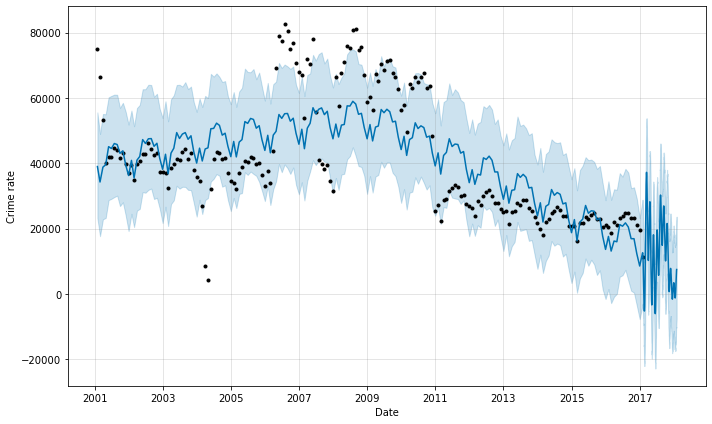

In [51]:
figure = profeta.plot(forecast, xlabel = 'Date', ylabel = 'Crime rate')


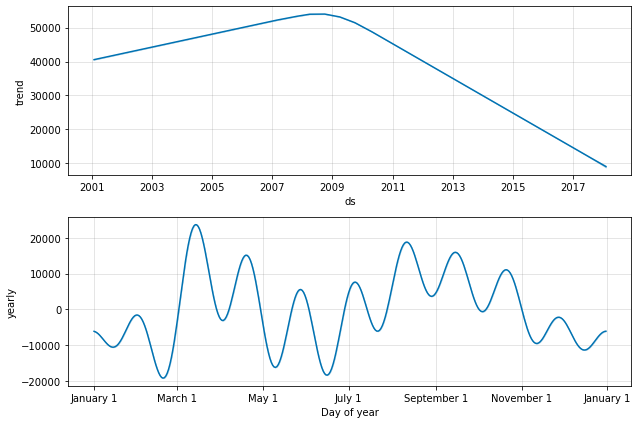

In [52]:
# Temporalidad
figure = profeta.plot_components(forecast)

In [53]:
futuro = profeta.make_future_dataframe(periods = 730)
forecast = profeta.predict(futuro)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40553.469848,23783.255277,55032.568656,40553.469848,40553.469848,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,0.0,0.0,0.0,38976.490634
1,2001-02-28,40700.768217,18765.399839,49906.046407,40700.768217,40700.768217,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,0.0,0.0,0.0,34246.887942
2,2001-03-31,40863.848554,23809.016554,54007.649810,40863.848554,40863.848554,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,0.0,0.0,0.0,38795.470312
3,2001-04-30,41021.668234,24007.859964,55213.444509,41021.668234,41021.668234,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,0.0,0.0,0.0,39548.594080
4,2001-05-31,41184.748571,28295.320938,60371.712190,41184.748571,41184.748571,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,0.0,0.0,0.0,45067.459019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2019-01-27,3996.150786,-15720.436453,17271.335967,3109.162343,4880.882020,-3601.851792,-3601.851792,-3601.851792,-3601.851792,-3601.851792,-3601.851792,0.0,0.0,0.0,394.298994
919,2019-01-28,3982.159365,-14700.278386,17408.972449,3092.056724,4867.639978,-2924.128098,-2924.128098,-2924.128098,-2924.128098,-2924.128098,-2924.128098,0.0,0.0,0.0,1058.031267
920,2019-01-29,3968.167945,-13962.864428,17697.832461,3075.078957,4855.774361,-2355.750788,-2355.750788,-2355.750788,-2355.750788,-2355.750788,-2355.750788,0.0,0.0,0.0,1612.417157
921,2019-01-30,3954.176524,-14544.413641,18155.394635,3058.252403,4843.908745,-1922.882860,-1922.882860,-1922.882860,-1922.882860,-1922.882860,-1922.882860,0.0,0.0,0.0,2031.293664


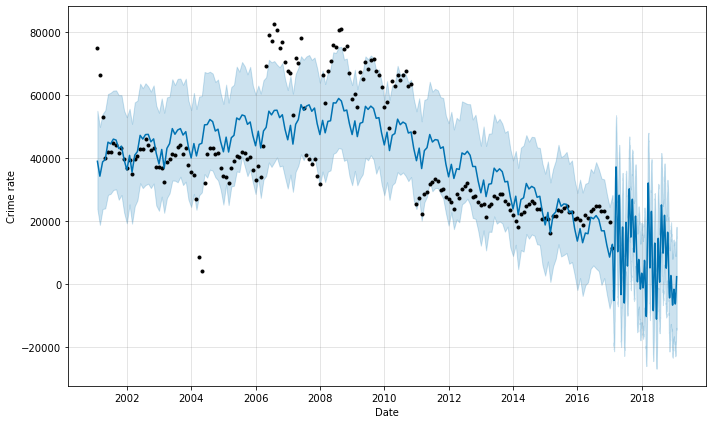

In [54]:
figure = profeta.plot(forecast, xlabel = 'Date', ylabel = 'Crime rate')

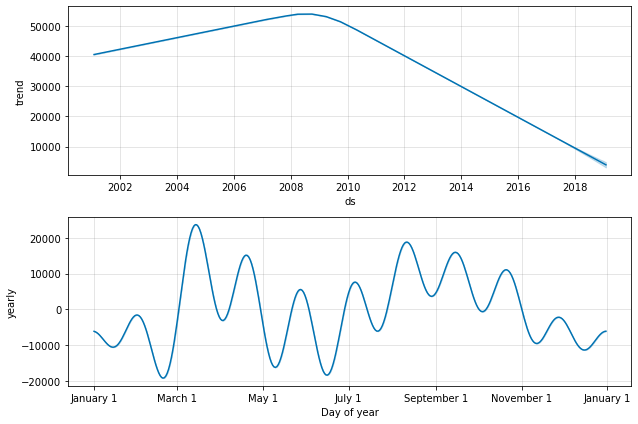

In [55]:
figure = profeta.plot_components(forecast)